NODES ALL

In [83]:
import pandas as pd

# our node files
nodes_A = pd.read_csv('nodes_A.csv')
nodes_B = pd.read_csv('nodes_B.csv')
nodes_C = pd.read_csv('nodes_C.csv')
nodes_D = pd.read_csv('nodes_D.csv')
nodes_E = pd.read_csv('nodes_E.csv')
nodes_L = pd.read_csv('nodes_L.csv')

# here I have combined nodes into one single DataFrame for efficiency and analyze because analyzing separately will be complicated
nodes_all = pd.concat([nodes_A, nodes_B, nodes_C, nodes_D, nodes_E, nodes_L], ignore_index=True)

# Combined nodes data
display(nodes_all.head())
print("Combined Nodes Data:")
print(nodes_all.info())

,node_id,name,building,floor,x,y,accessible
0,A101,Medium Case 101,A,1,10,30,1
1,A102,Medium Case 102,A,1,20,30,1
2,A109,Large Case 109,A,1,28,28,1
3,A110,Medium Case 110,A,1,15,24,1
4,A121,Conference 121,A,1,14,22,1


Combined Nodes Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   node_id     193 non-null    object
 1   name        193 non-null    object
 2   building    193 non-null    object
 3   floor       193 non-null    int64 
 4   x           193 non-null    int64 
 5   y           193 non-null    int64 
 6   accessible  193 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 10.7+ KB
None


EDGES ALL

In [84]:
# our edges files
edges_A = pd.read_csv('edges_A.csv')
edges_B = pd.read_csv('edges_B.csv')
edges_C = pd.read_csv('edges_C.csv')
edges_D = pd.read_csv('edges_D.csv')
edges_E = pd.read_csv('edges_E.csv')
edges_L = pd.read_csv('edges_L.csv')

# Combined
edges_all = pd.concat([edges_A, edges_B, edges_C, edges_D, edges_E, edges_L], ignore_index=True)

# Combined edges data
display(edges_all.head())
print("Combined Edges Data Summary:")
print(edges_all.info())

,u,v,base_distance,crowd_cost,is_stairs,is_elevator,is_blocked
0,A101,A102,12,0.5,0,0,0
1,A102,A109,8,0.6,0,0,0
2,A102,A110,10,0.4,0,0,0
3,A101,A121,10,0.8,0,0,0
4,A201,A202,12,0.2,0,0,0


Combined Edges Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   u              351 non-null    object 
 1   v              351 non-null    object 
 2   base_distance  351 non-null    int64  
 3   crowd_cost     351 non-null    float64
 4   is_stairs      351 non-null    int64  
 5   is_elevator    351 non-null    int64  
 6   is_blocked     351 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 19.3+ KB
None


VISUALIZATION (DISTRIBUTIONS)

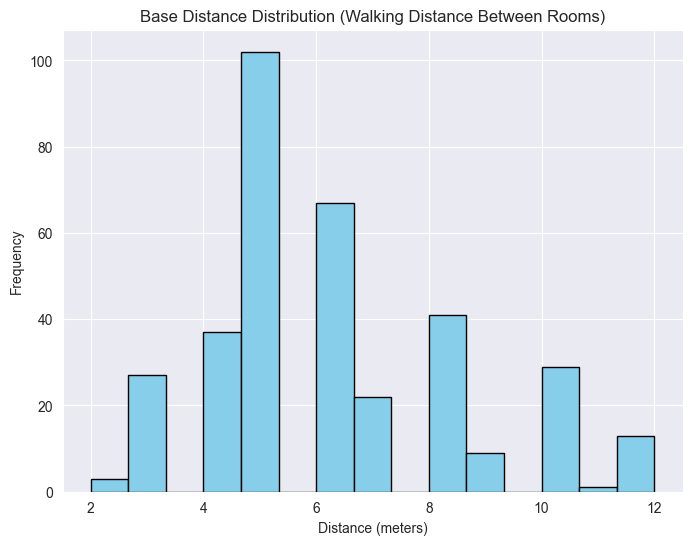

In [85]:
import matplotlib.pyplot as plt
# Distribution of base_distance (distance between rooms)
plt.figure(figsize=(8,6))
plt.hist(edges_all['base_distance'], bins=15, color='skyblue', edgecolor='black')
plt.title("Base Distance Distribution (Walking Distance Between Rooms)")
plt.xlabel("Distance (meters)")
plt.ylabel("Frequency")
plt.show()

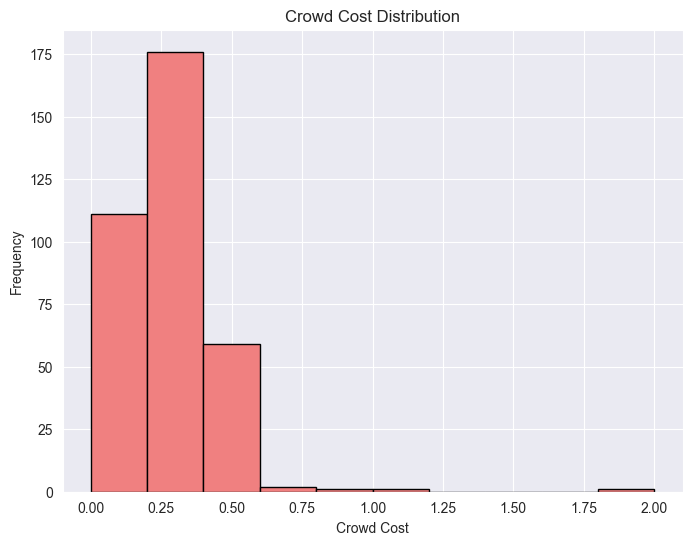

In [86]:
# Distribution of crowd cost (crowdiness of paths)
plt.figure(figsize=(8,6))
plt.hist(edges_all['crowd_cost'], bins=10, color='lightcoral', edgecolor='black')
plt.title("Crowd Cost Distribution")
plt.xlabel("Crowd Cost")
plt.ylabel("Frequency")
plt.show()

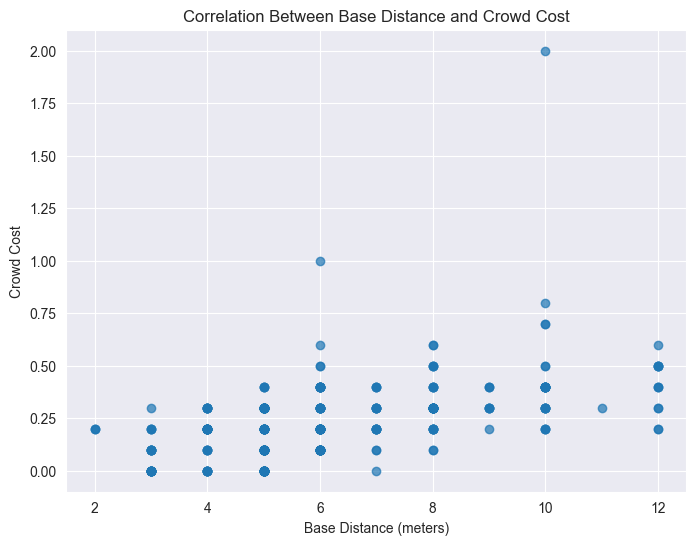

In [87]:
# Plot for the correlation between base_distance and crowd_cost
plt.figure(figsize=(8,6))
plt.scatter(edges_all['base_distance'], edges_all['crowd_cost'], alpha=0.7)
plt.title("Correlation Between Base Distance and Crowd Cost")
plt.xlabel("Base Distance (meters)")
plt.ylabel("Crowd Cost")
plt.grid(True)
plt.show()

MISSING VALUES CHECK

In [88]:
# Checking for missing data
print("Missing values in nodes:\n", nodes_all.isna().sum())
print("\nMissing values in edges:\n", edges_all.isna().sum())

Missing values in nodes:
 node_id       0
name          0
building      0
floor         0
x             0
y             0
accessible    0
dtype: int64

Missing values in edges:
 u                0
v                0
base_distance    0
crowd_cost       0
is_stairs        0
is_elevator      0
is_blocked       0
dtype: int64


OUTLIER DETECTION

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10468\1879162899.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([edges_all['base_distance'], edges_all['crowd_cost']], labels=["Base Distance", "Crowd Cost"])


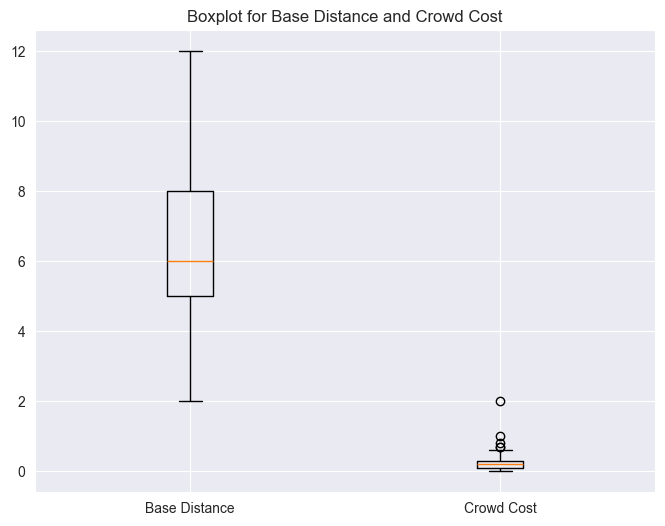

In [89]:
# Outliers in base_distance and crowd_cost
plt.figure(figsize=(8,6))
plt.boxplot([edges_all['base_distance'], edges_all['crowd_cost']], labels=["Base Distance", "Crowd Cost"])
plt.title("Boxplot for Base Distance and Crowd Cost")
plt.show()

SUMMARY

In [90]:
# Five number summary for base_distance and crowd_cost
print("Base Distance Summary:")
print(edges_all['base_distance'].describe())

print("\nCrowd Cost Summary:")
print(edges_all['crowd_cost'].describe())

Base Distance Summary:
count    351.000000
mean       6.173789
std        2.238877
min        2.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       12.000000
Name: base_distance, dtype: float64

Crowd Cost Summary:
count    351.000000
mean       0.233333
std        0.180000
min        0.000000
25%        0.100000
50%        0.200000
75%        0.300000
max        2.000000
Name: crowd_cost, dtype: float64


DATA TYPES

In [91]:
# Data types
print("Nodes Data Types:\n", nodes_all.dtypes)
print("\nEdges Data Types:\n", edges_all.dtypes)

Nodes Data Types:
 node_id       object
name          object
building      object
floor          int64
x              int64
y              int64
accessible     int64
dtype: object

Edges Data Types:
 u                 object
v                 object
base_distance      int64
crowd_cost       float64
is_stairs          int64
is_elevator        int64
is_blocked         int64
dtype: object


CORRELATION ANALYSIS


Correlation between Base Distance and Crowd Cost:
               base_distance  crowd_cost
base_distance       1.000000    0.524403
crowd_cost          0.524403    1.000000


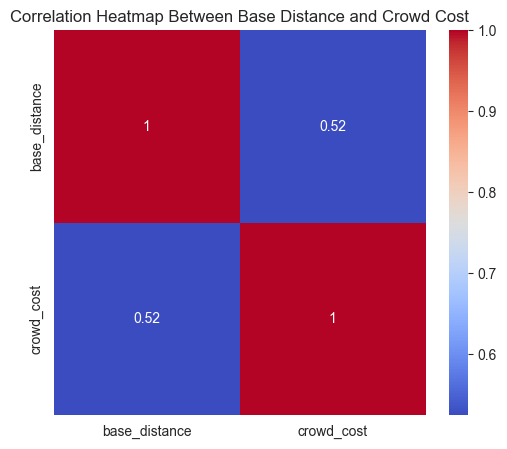

In [92]:
import seaborn as sns
# Correlation between base_distance and crowd_cost
correlation = edges_all[['base_distance', 'crowd_cost']].corr()
print("\nCorrelation between Base Distance and Crowd Cost:")
print(correlation)

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Between Base Distance and Crowd Cost")
plt.show()

PREPROCESSING

OUTLIER HANDLING (CAPPING)

In [93]:
# We decided to with capping because only 2 values really show off, so we checked 95th percentile for base_distance and crowd_cost
import numpy as np
base_distance_95th = np.percentile(edges_all['base_distance'], 95)
crowd_cost_95th = np.percentile(edges_all['crowd_cost'], 95)

# Capping values
edges_all['base_distance'] = np.where(edges_all['base_distance'] > base_distance_95th, base_distance_95th, edges_all['base_distance'])
edges_all['crowd_cost'] = np.where(edges_all['crowd_cost'] > crowd_cost_95th, crowd_cost_95th, edges_all['crowd_cost'])

# Statistics
print("Base Distance Summary after Percentile Capping:")
print(edges_all['base_distance'].describe())
print("\nCrowd Cost Summary after Percentile Capping:")
print(edges_all['crowd_cost'].describe())


Base Distance Summary after Percentile Capping:
count    351.000000
mean       6.096866
std        2.065158
min        2.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: base_distance, dtype: float64

Crowd Cost Summary after Percentile Capping:
count    351.000000
mean       0.224501
std        0.140908
min        0.000000
25%        0.100000
50%        0.200000
75%        0.300000
max        0.500000
Name: crowd_cost, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10468\3254201508.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([edges_all['base_distance'], edges_all['crowd_cost']], labels=["Base Distance", "Crowd Cost"])


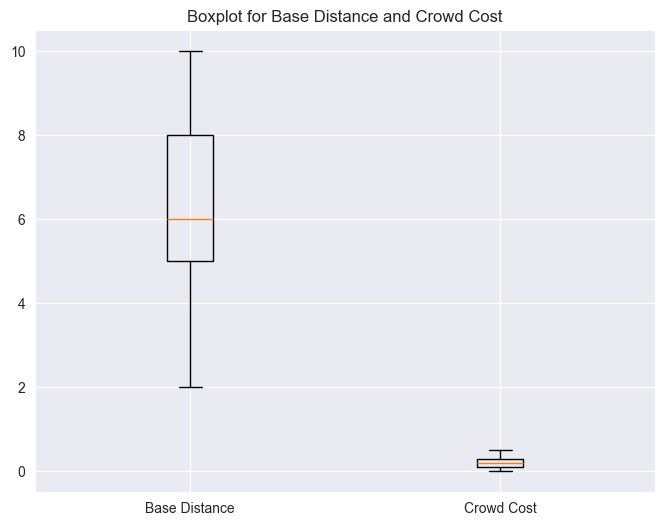

In [94]:
# Outliers check in base_distance and crowd_cost
plt.figure(figsize=(8,6))
plt.boxplot([edges_all['base_distance'], edges_all['crowd_cost']], labels=["Base Distance", "Crowd Cost"])
plt.title("Boxplot for Base Distance and Crowd Cost")
plt.show() # after the capping operation we saw that there were no longer any huge outliers

FEATURE ENGINEERING

In [95]:
# Here we decided to create one formula for 'final_cost' combining base_distance, crowd_cost, is_stairs, and is_elevator
ALPHA = 1.0 # crowd cost scaling
BETA  = 5.0 # stairs penalty
GAMMA = -3.0 # elevator advantage

edges_all['final_cost'] = (edges_all['base_distance'] + (ALPHA * edges_all['crowd_cost']) + (BETA * edges_all['is_stairs']) + (GAMMA * edges_all['is_elevator']))

# Updated edges dataframe with the new final_cost
display(edges_all[['u', 'v', 'base_distance', 'crowd_cost', 'is_stairs', 'is_elevator', 'final_cost']].head())

,u,v,base_distance,crowd_cost,is_stairs,is_elevator,final_cost
0,A101,A102,10.0,0.5,0,0,10.5
1,A102,A109,8.0,0.5,0,0,8.5
2,A102,A110,10.0,0.4,0,0,10.4
3,A101,A121,10.0,0.5,0,0,10.5
4,A201,A202,10.0,0.2,0,0,10.2


SCALING AND NORMALIZATION (NOT USED)

In [96]:
# from sklearn.preprocessing import MinMaxScaler
#
# # We decided to use the MinMaxScaling to actually bring base distance, crowd cost, and final cost to similar range between 0 and 1
# scaler = MinMaxScaler()
#
# # Scaling process
# edges_all[['base_distance', 'crowd_cost', 'final_cost']] = scaler.fit_transform(
#     edges_all[['base_distance', 'crowd_cost', 'final_cost']]
# )
#
# # Scaled data
# display(edges_all[['u', 'v', 'base_distance', 'crowd_cost', 'final_cost']].head())
# # after that our model started to threat all features equally

# we first scaled it using MinMaxScaler but then understood that it is wrong because we are working with real distances

FINAL DATA CHECK

In [97]:
print("Final Nodes Summary:")
print(nodes_all.describe())
print("\nFinal Edges Summary:")
print(edges_all.describe())

# Data types and structure
print("Nodes Info:\n", nodes_all.info())
print("Edges Info:\n", edges_all.info())

Final Nodes Summary:
            floor           x           y  accessible
count  193.000000  193.000000  193.000000       193.0
mean     1.336788   19.072539   25.362694         1.0
std      1.498452    6.587941    3.853172         0.0
min     -2.000000   10.000000   18.000000         1.0
25%      1.000000   12.000000   24.000000         1.0
50%      2.000000   18.000000   25.000000         1.0
75%      2.000000   25.000000   28.000000         1.0
max      4.000000   30.000000   30.000000         1.0

Final Edges Summary:
       base_distance  crowd_cost   is_stairs  is_elevator  is_blocked  \
count     351.000000  351.000000  351.000000   351.000000       351.0   
mean        6.096866    0.224501    0.185185     0.236467         0.0   
std         2.065158    0.140908    0.389002     0.425519         0.0   
min         2.000000    0.000000    0.000000     0.000000         0.0   
25%         5.000000    0.100000    0.000000     0.000000         0.0   
50%         6.000000    0.200000 

IMPLEMENTATION + EXPERIMENTS

In [98]:
# checking for missing edges for important rooms (elevators, stairs)
def check_for_missing_edges(nodes_all, edges_all):
    missing_edges = []
    for _, node in nodes_all.iterrows():
        connected_edges = edges_all[(edges_all['u'] == node['node_id']) | (edges_all['v'] == node['node_id'])]

        if connected_edges.empty:
            missing_edges.append(node['node_id'])

    if missing_edges:
        print(f"Missing edges for the following rooms: {missing_edges}")
    else:
        print("All rooms are properly connected")

# we just verify the graph for missing edges
check_for_missing_edges(nodes_all, edges_all)

initial_count = len(nodes_all)
nodes_all.drop_duplicates(subset='node_id', keep='first', inplace=True)
print(f"Removed {initial_count - len(nodes_all)} duplicate nodes.")


Missing edges for the following rooms: ['TOILET_B3', 'TOILET_D3']
Removed 3 duplicate nodes.


CHECKING FOR ONE BUILDING ONLY (RANDOM TEST CHECK)

In [99]:
import pandas as pd
import heapq
import time
import math

# mini EDA for checking of the specific building because before we used all of them now we again have to define
nodes_df = pd.read_csv('nodes_L.csv')
edges_df = pd.read_csv('edges_L.csv')

# here we remove duplicates just in case maybe there are some errors that we did not see
nodes_df.drop_duplicates(subset='node_id', keep='first', inplace=True)

# missing values
nodes_df.fillna(0, inplace=True)
edges_df.fillna(0, inplace=True)

# final_cost calculation
ALPHA = 1.0
BETA  = 5.0
GAMMA = -3.0

# this part is mainly needed so that sometimes in csv files we can have data stored as text rather than number, so to be 100% sure that everything is okay we do the numeric and consider that okay if room indicated noting there is probably 1 meter difference so that's why we have fillna(1.0) and if nothing for crowd the 0
edges_df['base_distance'] = pd.to_numeric(edges_df['base_distance'], errors='coerce').fillna(1.0)
edges_df['crowd_cost'] = pd.to_numeric(edges_df['crowd_cost'], errors='coerce').fillna(0.0)

edges_df['final_cost'] = (edges_df['base_distance'] + (ALPHA * edges_df['crowd_cost']) + (BETA * edges_df.get('is_stairs', 0)) + (GAMMA * edges_df.get('is_elevator', 0)))

# just a check so that we do not get 0 or negative for A* because it can make infinite loop risk for us
edges_df['final_cost'] = edges_df['final_cost'].apply(lambda x: max(x, 0.1))

print(f"Nodes and Edges Loaded:")
print(f"Nodes: {len(nodes_df)}")
print(f"Edges: {len(edges_df)}")
display(edges_df[['u', 'v', 'final_cost']].head())

Nodes and Edges Loaded:
Nodes: 21
Edges: 34


,u,v,final_cost
0,L201,L202,8.3
1,L202,L203,6.2
2,L203,TOILET_L3,8.3
3,STAIRS_L1,STAIRS_L2,8.0
4,STAIRS_L2,STAIRS_L3,8.0


In [100]:
class CampusGraph: # this is mainly the brain of our map (from csv to data structure)
    def __init__(self, nodes_df, edges_df):
        self.nodes = nodes_df.set_index('node_id').to_dict('index') # we convert dataframe into dicionary for efficiency
        self.graph = {} # and store data here
        self.construct_graph(edges_df)

    def construct_graph(self, edges_df): # here we just build the adjacency list
        for _, row in edges_df.iterrows():
            u, v = row['u'], row['v']
            cost = row['final_cost']

            if u in self.nodes and v in self.nodes: # we only add edges if both nodes exist in our node list
                if u not in self.graph: self.graph[u] = []
                if v not in self.graph: self.graph[v] = []

                self.graph[u].append((v, cost)) # fir bidirectional checking (if you can walk from A to B then you can walk from B to A)
                self.graph[v].append((u, cost))

    def get_coordinates(self, node_id): # this is mainly needed so that A^* knows where things are located to make guesses, so it checks the node id in directory and return X and Y values
        if node_id in self.nodes:
            return self.nodes[node_id].get('x', 0), self.nodes[node_id].get('y', 0)
        return 0, 0

    def heuristic(self, start_id, goal_id): # Euclidean distance heuristic / we have chosen Euclidean because it makes our A^* algorithm admissible
        x1, y1 = self.get_coordinates(start_id)
        x2, y2 = self.get_coordinates(goal_id)
        return math.sqrt((x1 - x2)**2 + (y1 - y2)**2) # formula

In [101]:
class PathFinder(CampusGraph):

    def reconstruct_path(self, came_from, current): # here we rebuild path from Goal -> Start and we need now Start -> Goal for the proper path that's why we reverse
        path = [current]
        while current in came_from:
            current = came_from[current]
            path.append(current)
        return path[::-1] # in order to get the proper path we need to reverse list

    def a_star_search(self, start, goal): # A^* algorithm
        open_list = [] # priority queue list
        heapq.heappush(open_list, (0, start)) # heapq makes the list sorted so the candidate with the lowest cost score is always on the top
        came_from = {}
        g_score = {node: float('inf') for node in self.nodes} # calculation of the actual cost
        g_score[start] = 0
        nodes_expanded = 0

        while open_list:
            _, current = heapq.heappop(open_list) # take the node from the list
            nodes_expanded += 1

            if current == goal: # if we are there we reconstruct the path
                return self.reconstruct_path(came_from, current), g_score[goal], nodes_expanded

            if current not in self.graph: continue # if not we have to continue
            for neighbor, weight in self.graph[current]:
                tentative_g = g_score[current] + weight

                if tentative_g < g_score[neighbor]: # here we check that did we find the fastest way to return, if yes we update path and cost
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + self.heuristic(neighbor, goal) # formula for the A^* -> actual + heuristics
                    heapq.heappush(open_list, (f_score, neighbor))

        return None, float('inf'), nodes_expanded

    def greedy_best_first_search(self, start, goal): # Greedy Algorithm
        open_list = []
        heapq.heappush(open_list, (self.heuristic(start, goal), start))

        came_from = {}
        visited = set() # this is used to not get stuck in loop because it does not track the path costs so it can look at the same node twice -> we prevent it here
        cost_tracker = {start: 0} # just for tracking, not logic
        nodes_expanded = 0

        while open_list:
            _, current = heapq.heappop(open_list) # again same logic like in A^* just we do not use g_score, only heuristics

            if current in visited: continue
            visited.add(current)
            nodes_expanded += 1

            if current == goal:
                return self.reconstruct_path(came_from, current), cost_tracker[current], nodes_expanded

            if current not in self.graph: continue
            for neighbor, weight in self.graph[current]:
                if neighbor not in visited:
                    came_from[neighbor] = current
                    cost_tracker[neighbor] = cost_tracker[current] + weight
                    heapq.heappush(open_list, (self.heuristic(neighbor, goal), neighbor))

        return None, float('inf'), nodes_expanded

# Initialize AI for buildings
ai_system = PathFinder(nodes_df, edges_df)
print("AI algorithms are ready for specific building")

AI algorithms are ready for specific building


In [102]:
import random

# Valid nodes for building
valid_nodes = list(ai_system.nodes.keys())

# 3 random test cases for building specified
test_cases = []
for _ in range(3):
    start = random.choice(valid_nodes)
    end = random.choice(valid_nodes)
    while start == end: # here we ensure that start != end (for example find path from room 101 to room 101)
        end = random.choice(valid_nodes)
    test_cases.append((start, end))

print(f"{'Algorithm'} | {'Path Info'} | {'Cost'} | {'Nodes Exp.'} | {'Time'}")
print("=" * 100)

for i, (start, end) in enumerate(test_cases, 1):
    print(f"TEST CASE {i}: {start} -> {end}")
    print("-" * 100)

    # A^*
    t0 = time.time() # start the timer
    path_a, cost_a, exp_a = ai_system.a_star_search(start, end)
    t1 = time.time() #stop the timer

    cost_str_a = f"{cost_a:.2f}" if path_a else "No Path"
    print(f"{'A^*'} | {'(Path to see below)'} | {cost_str_a} | {exp_a} | {t1-t0}")
    print(f"Path: {path_a}")

    # Test Greedy
    t0 = time.time()
    path_g, cost_g, exp_g = ai_system.greedy_best_first_search(start, end)
    t1 = time.time()

    cost_str_g = f"{cost_g:.2f}" if path_g else "No Path"
    print(f"{'Greedy BFS'} | {'(Path to see below)'} | {cost_str_g} | {exp_g} | {t1-t0}")
    print(f"Path: {path_g}")
    print("=" * 100)

Algorithm | Path Info | Cost | Nodes Exp. | Time
TEST CASE 1: TOILET_L2 -> ELEV_A_L3
----------------------------------------------------------------------------------------------------
A^* | (Path to see below) | 10.20 | 5 | 0.0
Path: ['TOILET_L2', 'STAIRS_L2', 'ELEV_A_L2', 'ELEV_A_L3']
Greedy BFS | (Path to see below) | 10.20 | 5 | 0.0
Path: ['TOILET_L2', 'STAIRS_L2', 'ELEV_A_L2', 'ELEV_A_L3']
TEST CASE 2: ELEV_B_L1 -> L203
----------------------------------------------------------------------------------------------------
A^* | (Path to see below) | 6.30 | 4 | 0.0
Path: ['ELEV_B_L1', 'ELEV_B_L2', 'ELEV_B_L3', 'L203']
Greedy BFS | (Path to see below) | 6.30 | 4 | 0.0
Path: ['ELEV_B_L1', 'ELEV_B_L2', 'ELEV_B_L3', 'L203']
TEST CASE 3: ELEV_B_L4 -> STAIRS_L4
----------------------------------------------------------------------------------------------------
A^* | (Path to see below) | 11.50 | 3 | 0.0
Path: ['ELEV_B_L4', 'L303', 'STAIRS_L4']
Greedy BFS | (Path to see below) | 11.50 | 3 |

Generating clean visualizations for 3 cases


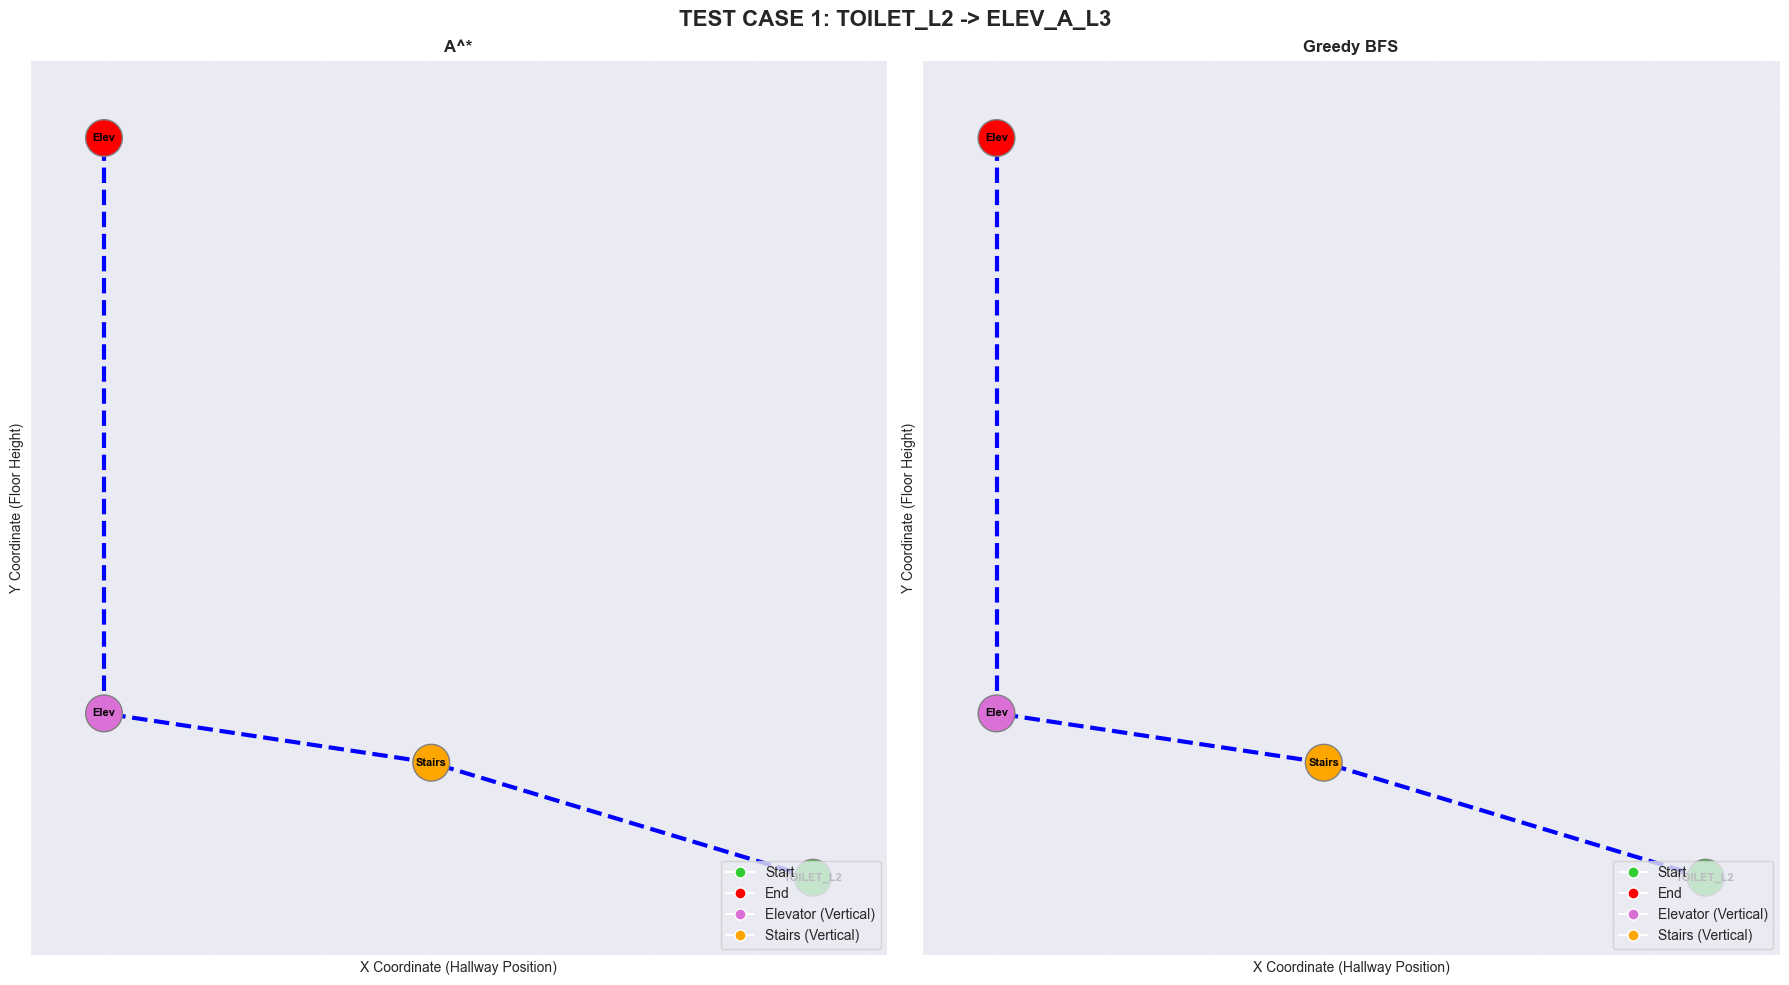

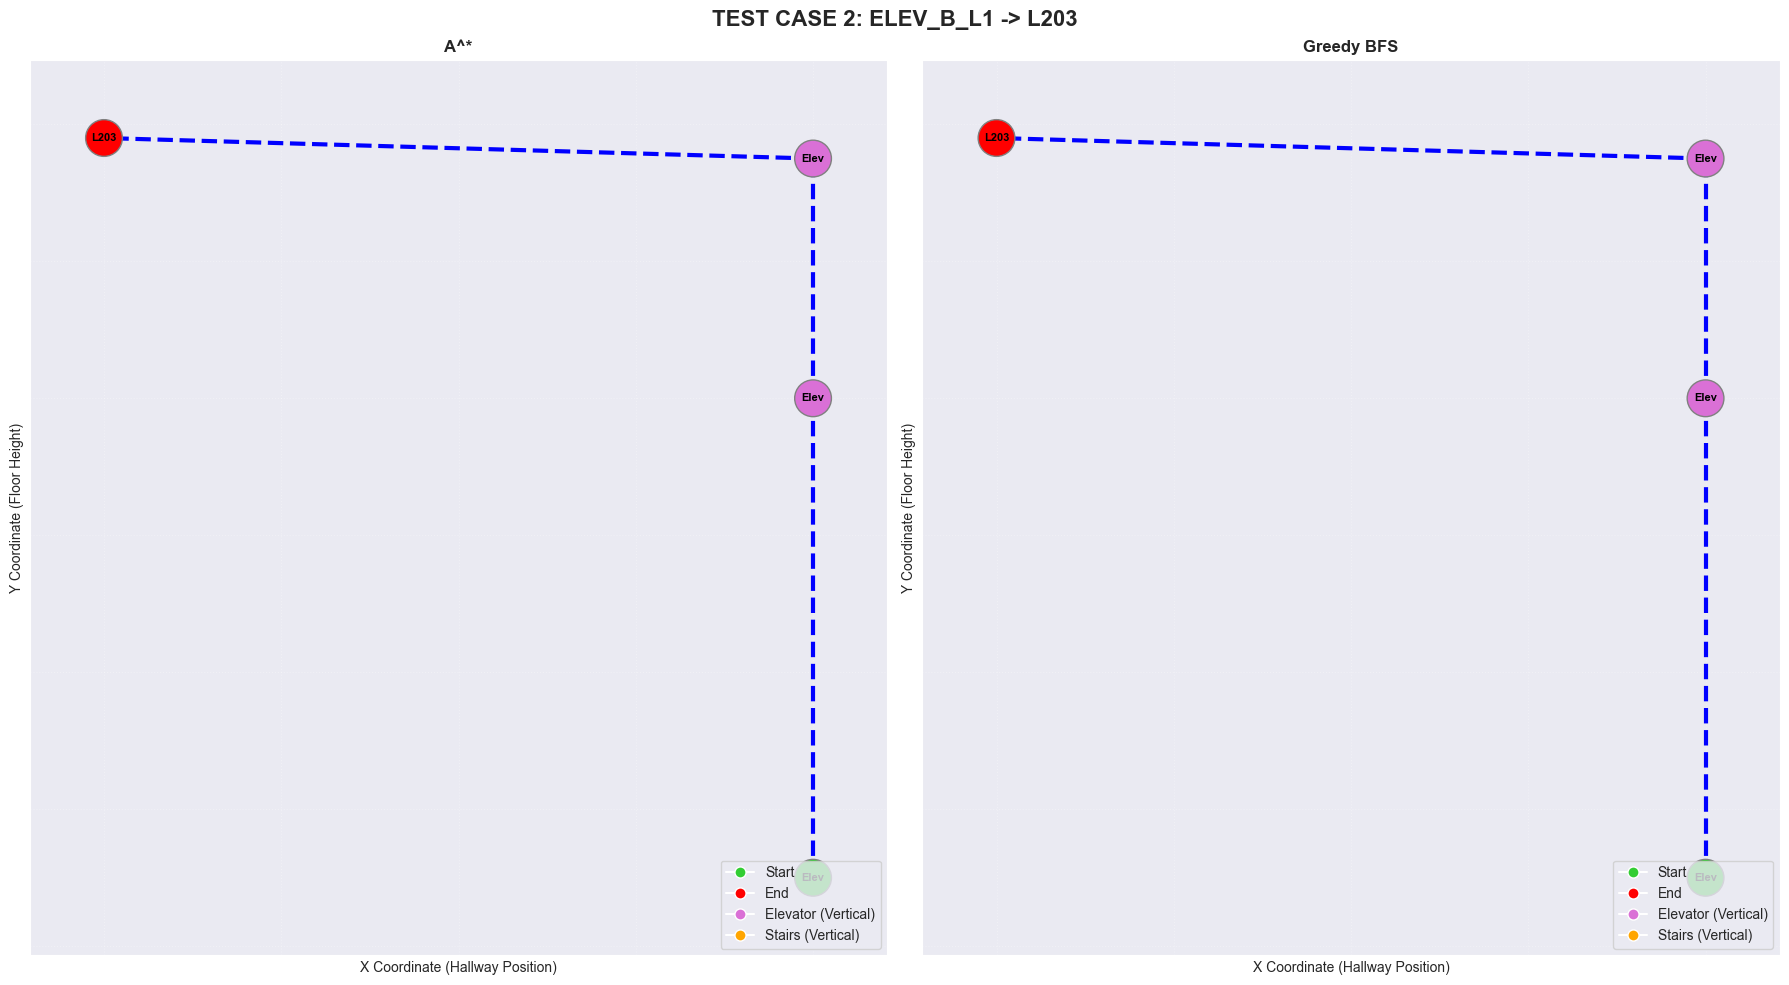

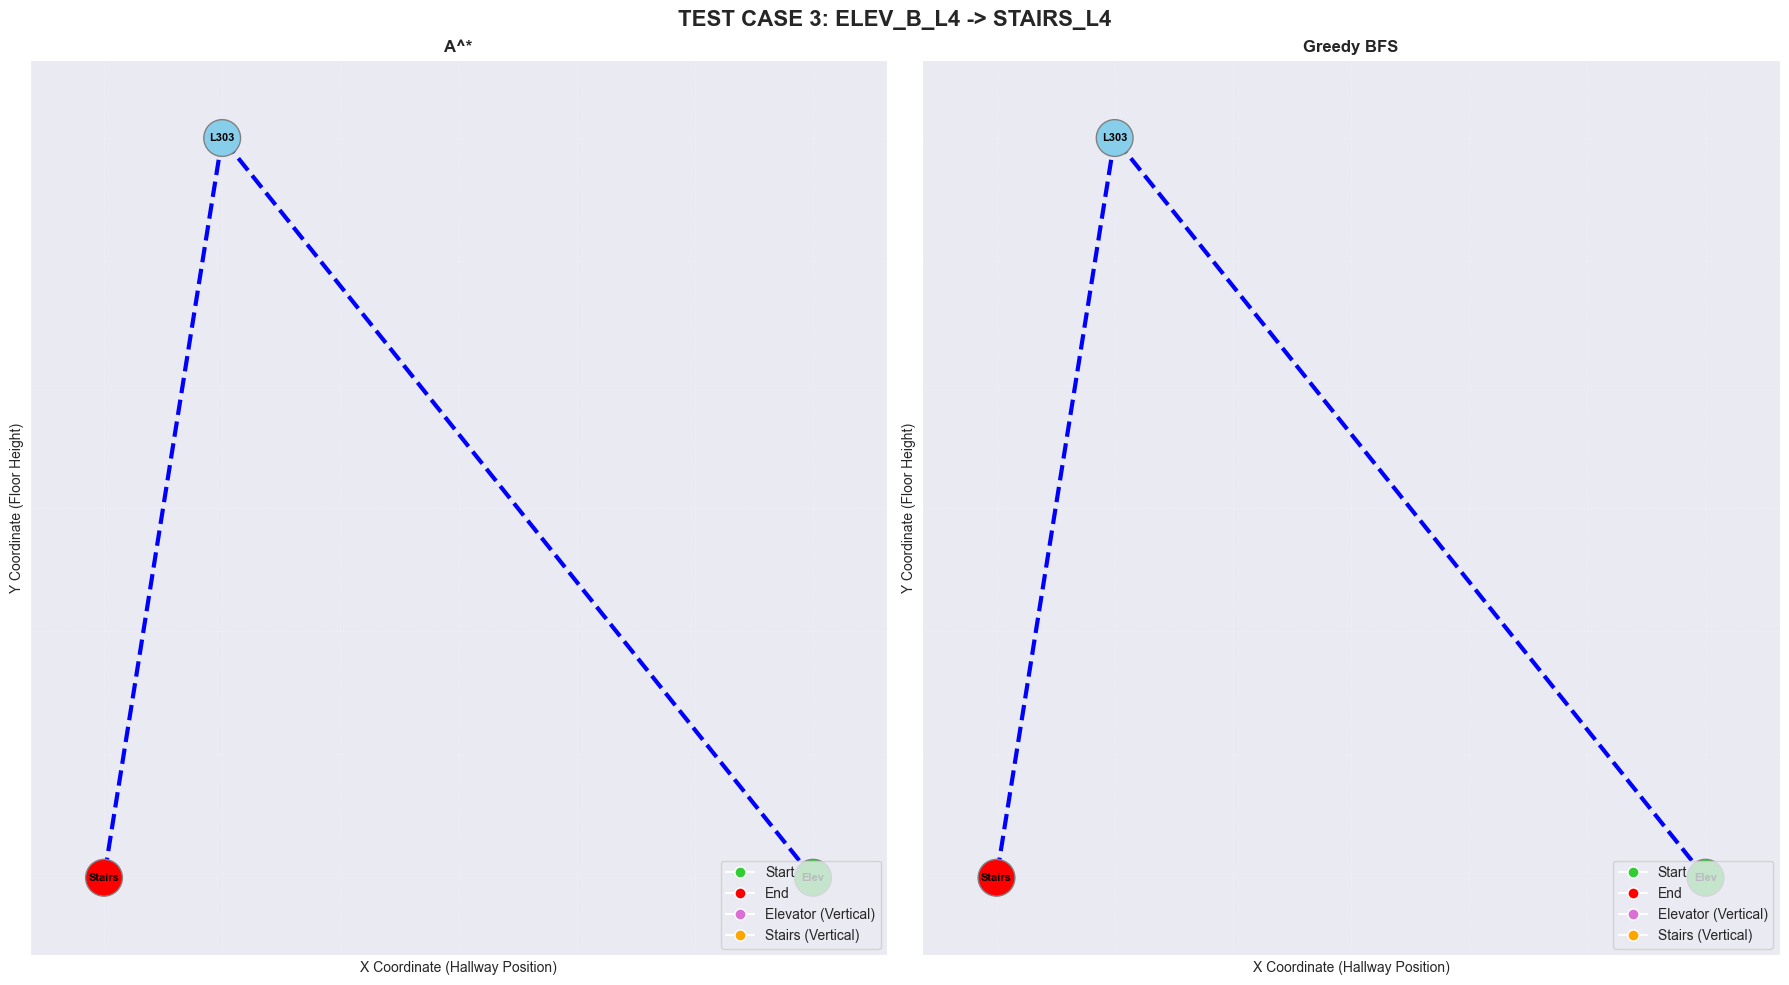

In [103]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_comparison_clean(graph_system, path_a, path_g, start, end, case_num):
    # subplots for A^* and Greedy (Left = A^*, Right = Greedy)
    fig, axes = plt.subplots(1, 2, figsize=(18, 10)) # axes 1 for a star and axes 2 for greedy
    fig.suptitle(f"TEST CASE {case_num}: {start} -> {end}", fontsize=16, fontweight='bold')
    # This separates the floors vertically without needing extra labels.
    FLOOR_OFFSET = 35

    pos_stacked = {}
    for n, data in graph_system.nodes.items():
        pos_stacked[n] = (data['x'], data['y'] + (data['floor'] * FLOOR_OFFSET)) # for proper y coordinate visualization because floors can overlap

    # Subplot
    def draw_subplot(ax, path, algo_name): # subplot
        if not path:
            ax.text(0.5, 0.5, "No Path Found", ha='center', fontsize=12)
            ax.set_title(algo_name)
            return

        # instead of building the whole building graph, we only focus on our path
        G = nx.Graph()
        path_edges = list(zip(path, path[1:]))
        G.add_edges_from(path_edges)

        # Colors and Labels
        node_colors = []
        labels = {}

        for node in path:
            # Color logic
            if node == start: color = 'limegreen'
            elif node == end: color = 'red'
            elif "ELEV" in node: color = 'orchid' # Purple for Elevators
            elif "STAIRS" in node: color = 'orange' # Orange for Stairs
            else: color = 'skyblue' # Blue for Rooms
            node_colors.append(color)

            # Label logic, so here we use short names
            if "STAIRS" in node: labels[node] = "Stairs"
            elif "ELEV" in node: labels[node] = "Elev"
            else: labels[node] = node

        # Graph
        # Nodes
        nx.draw_networkx_nodes(G, pos_stacked, ax=ax, node_color=node_colors, node_size=700, edgecolors='gray')

        # Edges
        nx.draw_networkx_edges(G, pos_stacked, ax=ax, edgelist=path_edges, edge_color='blue', width=3, style='dashed')

        # Labels
        nx.draw_networkx_labels(G, pos_stacked, ax=ax, labels=labels, font_size=8, font_weight='bold')

        # Titles & Axis
        ax.set_title(algo_name, fontsize=12, fontweight='bold')
        ax.set_xlabel("X Coordinate (Hallway Position)")
        ax.set_ylabel("Y Coordinate (Floor Height)")
        ax.grid(True, linestyle=':', alpha=0.3) # this is faint grid for X/Y reference

        # Legend
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor='limegreen', label='Start', markersize=8),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='End', markersize=8),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='orchid', label='Elevator (Vertical)', markersize=8),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='Stairs (Vertical)', markersize=8)
        ]
        ax.legend(handles=legend_elements, loc='lower right')

    # here we finally draw both plots
    draw_subplot(axes[0], path_a, "A^*")
    draw_subplot(axes[1], path_g, "Greedy BFS")

    plt.tight_layout()
    plt.show()

# Execution part
if 'test_cases' in locals() and test_cases: # generate 3 test cases
    print(f"Generating clean visualizations for {len(test_cases)} cases")

    for i, (start, end) in enumerate(test_cases, 1):
        # so here we recalculate path to ensure we have the data needed as in the previous cell we printed cost as numbers but we need path list
        path_a, _, _ = ai_system.a_star_search(start, end)
        path_g, _, _ = ai_system.greedy_best_first_search(start, end)
        visualize_comparison_clean(ai_system, path_a, path_g, start, end, i)
else:
    print("No 'test_cases' found. Please run the experiment cell first.")

CHECKING FOR ONE BUILDING ONLY (MANUAL TEST CHECK) - {EDA + Pathfinding cells related to Random check have to be run first}

In [104]:
# for manual test
START_NODE = 'L201'
END_NODE = 'L301'

print(f"MANUAL TEST: {START_NODE} -> {END_NODE}")
print("=" * 100)

# if nodes exist or not to avoid crashing
if START_NODE not in ai_system.nodes or END_NODE not in ai_system.nodes:
    print(f"Error: One of the nodes ({START_NODE} or {END_NODE}) does not exist in the node list.")
else:
    print(f"{'Algorithm'} | {'Path Info'} | {'Cost'} | {'Nodes Exp.'} | {'Time'}")
    print("-" * 100)

    # A^*
    t0 = time.time()
    path_a, cost_a, exp_a = ai_system.a_star_search(START_NODE, END_NODE)
    t1 = time.time()

    cost_str_a = f"{cost_a:.2f}" if path_a else "No Path"
    print(f"{'A^*'} | {'(See below)'} | {cost_str_a:} | {exp_a:} | {t1-t0:}")
    print(f"Path: {path_a}")

    # Greedy
    t0 = time.time()
    path_g, cost_g, exp_g = ai_system.greedy_best_first_search(START_NODE, END_NODE)
    t1 = time.time()

    cost_str_g = f"{cost_g:.2f}" if path_g else "No Path"
    print(f"{'Greedy BFS'} | {'(See below)'} | {cost_str_g} | {exp_g} | {t1-t0}")
    print(f"Path: {path_g}")
    print("=" * 100)

MANUAL TEST: L201 -> L301
Algorithm | Path Info | Cost | Nodes Exp. | Time
----------------------------------------------------------------------------------------------------
A^* | (See below) | 8.40 | 5 | 0.0
Path: ['L201', 'ELEV_A_L3', 'ELEV_A_L4', 'L301']
Greedy BFS | (See below) | 8.40 | 6 | 0.0
Path: ['L201', 'ELEV_A_L3', 'ELEV_A_L4', 'L301']


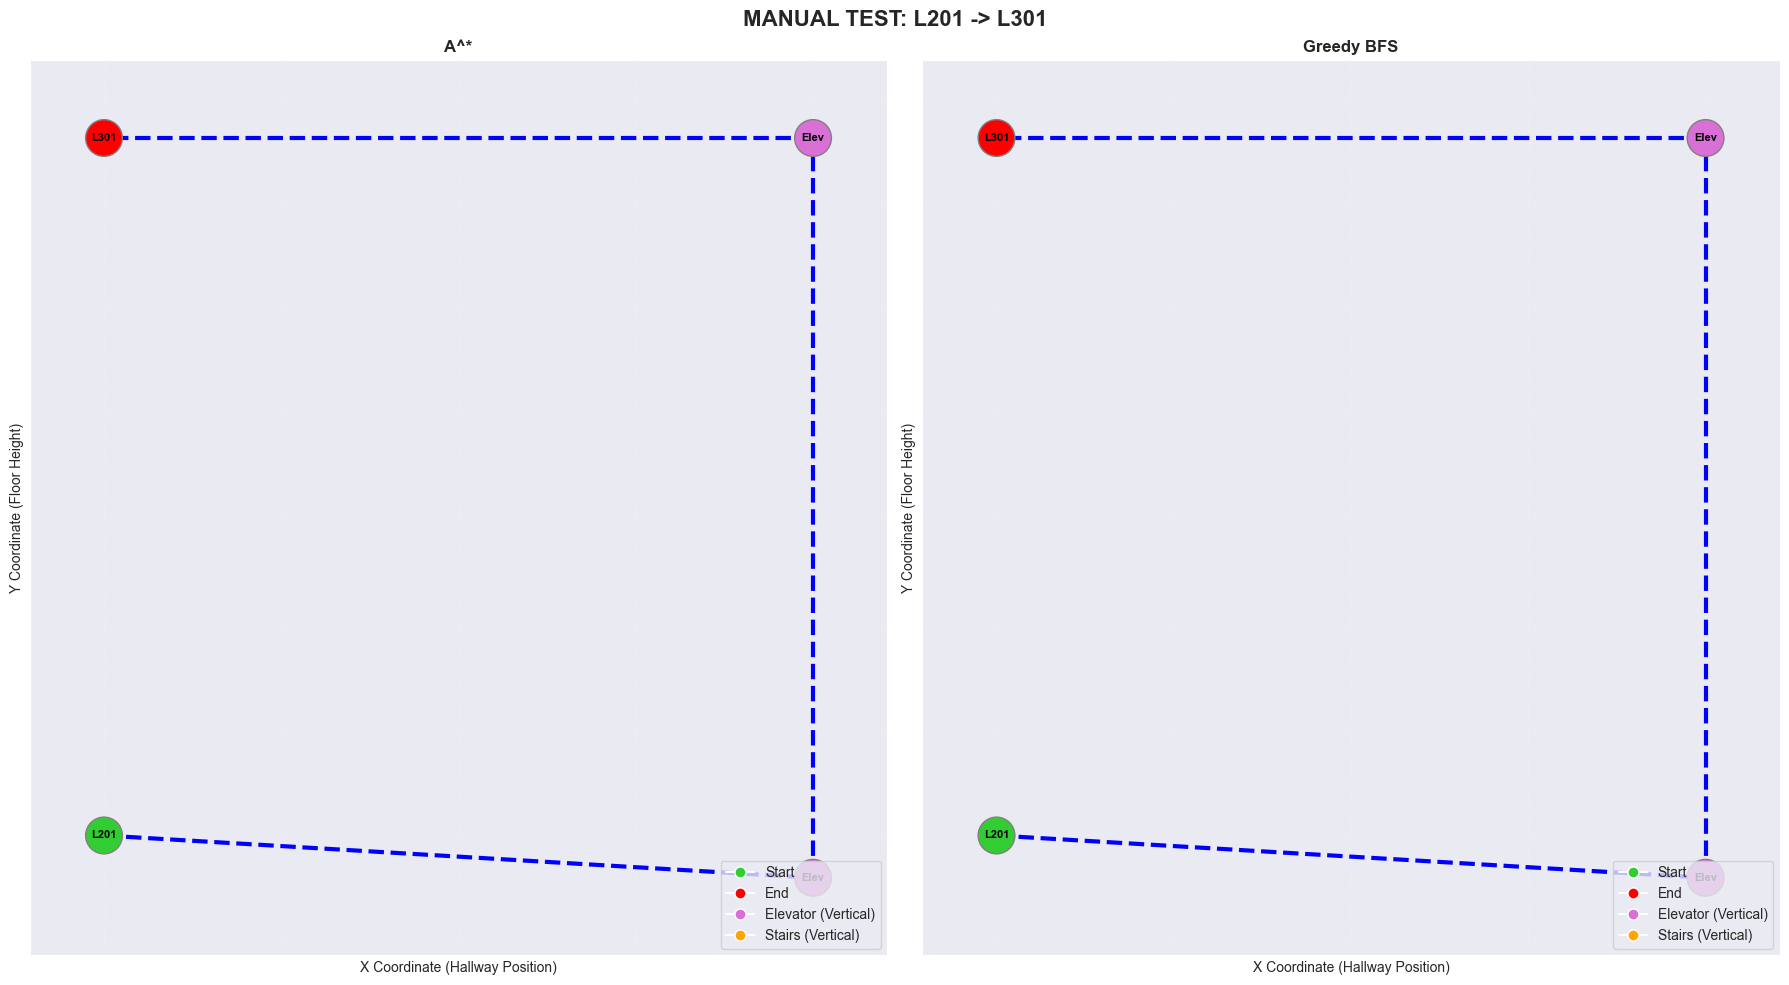

In [105]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_manual_clean(graph_system, path_a, path_g, start, end):
    if not path_a and not path_g:
        print("No paths found to visualize.")
        return

    # figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    fig.suptitle(f"MANUAL TEST: {start} -> {end}", fontsize=16, fontweight='bold')

    FLOOR_OFFSET = 35

    pos_stacked = {}
    for n, data in graph_system.nodes.items():
        pos_stacked[n] = (data['x'], data['y'] + (data['floor'] * FLOOR_OFFSET))

    # Subplot
    def draw_subplot(ax, path, algo_name):
        if not path:
            ax.text(0.5, 0.5, "No Path Found", ha='center', fontsize=12)
            ax.set_title(algo_name)
            return

        G = nx.Graph()
        path_edges = list(zip(path, path[1:]))
        G.add_edges_from(path_edges)

        # Colors & Labels
        node_colors = []
        labels = {}

        for node in path:
            # Color Logic
            if node == start: color = 'limegreen'
            elif node == end: color = 'red'
            elif "ELEV" in node: color = 'orchid'
            elif "STAIRS" in node: color = 'orange'
            else: color = 'skyblue'
            node_colors.append(color)

            # Label Logic (Short names)
            if "STAIRS" in node: labels[node] = "Stairs"
            elif "ELEV" in node: labels[node] = "Elev"
            else: labels[node] = node

        # Graph
        # Nodes
        nx.draw_networkx_nodes(G, pos_stacked, ax=ax, node_color=node_colors, node_size=700, edgecolors='gray')

        # Edges
        nx.draw_networkx_edges(G, pos_stacked, ax=ax, edgelist=path_edges, edge_color='blue', width=3, style='dashed')

        # Labels
        nx.draw_networkx_labels(G, pos_stacked, ax=ax, labels=labels, font_size=8, font_weight='bold')

        # Titles & Axis
        ax.set_title(algo_name, fontsize=12, fontweight='bold')
        ax.set_xlabel("X Coordinate (Hallway Position)")
        ax.set_ylabel("Y Coordinate (Floor Height)")
        ax.grid(True, linestyle=':', alpha=0.3)

        # Legend
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor='limegreen', label='Start', markersize=8),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='End', markersize=8),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='orchid', label='Elevator (Vertical)', markersize=8),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='Stairs (Vertical)', markersize=8)
        ]
        ax.legend(handles=legend_elements, loc='lower right')

    # Both plots
    draw_subplot(axes[0], path_a, "A^*")
    draw_subplot(axes[1], path_g, "Greedy BFS")

    plt.tight_layout()
    plt.show()

# Execution
if 'path_a' in locals() and 'path_g' in locals():
    visualize_manual_clean(ai_system, path_a, path_g, START_NODE, END_NODE)
else:
    print("Please run the Manual Test Execution cell above first.")

BETWEEN BUILDINGS

In [106]:
import pandas as pd
import heapq
import time
import math
import matplotlib.pyplot as plt
import networkx as nx

# here we define offsets / this is needed cause in every building it starts from (0,0), and if we just merge them one building will be inside other, so we make space between them
building_offsets = {
    'A': (0, 0), 'B': (60, 0), 'C': (120, 0),
    'D': (0, 80), 'E': (60, 80), 'L': (120, 80)
}

# due to the fact that in our nodes we have same names for nodes, we need to make proper naming for them, so we add prefix
def load_building_safe(code, node_file, edge_file):
    nodes = pd.read_csv(node_file)
    edges = pd.read_csv(edge_file)

    # This prevents mainly for example "ELEV_A_1" in Building A from merging with "ELEV_A_1" in Building B.
    nodes['node_id'] = f"{code}_" + nodes['node_id'].astype(str)
    edges['u'] = f"{code}_" + edges['u'].astype(str)
    edges['v'] = f"{code}_" + edges['v'].astype(str)

    # Clean and Offset
    nodes.drop_duplicates(subset='node_id', keep='first', inplace=True)
    nodes.fillna(0, inplace=True)
    edges.fillna(0, inplace=True)

    off_x, off_y = building_offsets.get(code, (0,0))
    nodes['x'] = nodes['x'] + off_x # we have the new coordinates because we apply local x and new shifted x
    nodes['y'] = nodes['y'] + off_y

    # Costs
    edges['base_distance'] = pd.to_numeric(edges['base_distance'], errors='coerce').fillna(1.0)
    edges['crowd_cost'] = pd.to_numeric(edges['crowd_cost'], errors='coerce').fillna(0.0)

    # we again define the final_cost
    ALPHA, BETA, GAMMA = 1.0, 5.0, -3.0
    edges['final_cost'] = (edges['base_distance'] + (ALPHA * edges['crowd_cost']) + (BETA * edges.get('is_stairs', 0)) + (GAMMA * edges.get('is_elevator', 0)))
    edges['final_cost'] = edges['final_cost'].apply(lambda x: max(x, 0.1)) # the minimum has to be 0.1 because if we will have 0.0 there can be infinite loop problem

    return nodes, edges

# here we just load and merge them all in one list
nA, eA = load_building_safe('A', 'nodes_A.csv', 'edges_A.csv')
nB, eB = load_building_safe('B', 'nodes_B.csv', 'edges_B.csv')
nC, eC = load_building_safe('C', 'nodes_C.csv', 'edges_C.csv')
nD, eD = load_building_safe('D', 'nodes_D.csv', 'edges_D.csv')
nE, eE = load_building_safe('E', 'nodes_E.csv', 'edges_E.csv')
nL, eL = load_building_safe('L', 'nodes_L.csv', 'edges_L.csv')

nodes_all = pd.concat([nA, nB, nC, nD, nE, nL], ignore_index=True)
edges_all = pd.concat([eA, eB, eC, eD, eE, eL], ignore_index=True)

# here we create connections between building, so logically if you go from stairs of one building to another you will get to the next building
bridge_data = [
    # A to B (Horizontal)
    {'u': 'A_STAIRS_A1', 'v': 'B_STAIRS_1', 'base_distance': 40, 'final_cost': 40},

    # B to C (Horizontal)
    {'u': 'B_STAIRS_1', 'v': 'C_STAIRS_C1', 'base_distance': 40, 'final_cost': 40},

    # A to D (Vertical)
    {'u': 'A_STAIRS_A1', 'v': 'D_STAIRS_D2', 'base_distance': 50, 'final_cost': 50},

    # B to E (Vertical)
    {'u': 'B_STAIRS_1', 'v': 'E_STAIRS_E2', 'base_distance': 50, 'final_cost': 50},

    # C to L (Vertical)
    {'u': 'C_STAIRS_C1', 'v': 'L_STAIRS_L2', 'base_distance': 50, 'final_cost': 50},
]

bridge_df = pd.DataFrame(bridge_data)
edges_all = pd.concat([edges_all, bridge_df], ignore_index=True) # we add them all

# here we again check for deduplication just to be safe
nodes_all.drop_duplicates(subset='node_id', keep='first', inplace=True)

print("Unified Campus Graph Built")
print(f"Total Nodes: {len(nodes_all)}")

Unified Campus Graph Built
Total Nodes: 193


In [107]:
class CampusGraph: # agin here we do the same steps that we had before
    def __init__(self, nodes_df, edges_df):
        self.nodes = nodes_df.set_index('node_id').to_dict('index')
        self.graph = {}
        self.construct_graph(edges_df)

    def construct_graph(self, edges_df):
        for _, row in edges_df.iterrows():
            u, v = row['u'], row['v']
            cost = row['final_cost']

            # Verify nodes exist before connecting
            if u in self.nodes and v in self.nodes:
                if u not in self.graph: self.graph[u] = []
                if v not in self.graph: self.graph[v] = []
                self.graph[u].append((v, cost))
                self.graph[v].append((u, cost))

    def get_coordinates(self, node_id):
        if node_id in self.nodes:
            return self.nodes[node_id].get('x', 0), self.nodes[node_id].get('y', 0)
        return 0, 0

    def heuristic(self, start_id, goal_id):
        x1, y1 = self.get_coordinates(start_id)
        x2, y2 = self.get_coordinates(goal_id)
        return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

class PathFinder(CampusGraph):
    def reconstruct_path(self, came_from, current):
        path = [current]
        while current in came_from:
            current = came_from[current]
            path.append(current)
        return path[::-1]

    def a_star_search(self, start, goal):
        open_list = []
        heapq.heappush(open_list, (0, start))
        came_from = {}
        g_score = {node: float('inf') for node in self.nodes}
        g_score[start] = 0
        nodes_expanded = 0

        while open_list:
            _, current = heapq.heappop(open_list)
            nodes_expanded += 1
            if current == goal:
                return self.reconstruct_path(came_from, current), g_score[goal], nodes_expanded

            if current not in self.graph: continue

            for neighbor, weight in self.graph[current]:
                tentative_g = g_score[current] + weight
                if tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f = tentative_g + self.heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f, neighbor))
        return None, float('inf'), nodes_expanded

    def greedy_best_first_search(self, start, goal):
        open_list = []
        heapq.heappush(open_list, (self.heuristic(start, goal), start))
        came_from = {}
        visited = set()
        cost_tracker = {start: 0}
        nodes_expanded = 0

        while open_list:
            _, current = heapq.heappop(open_list)
            if current in visited: continue
            visited.add(current)
            nodes_expanded += 1
            if current == goal:
                return self.reconstruct_path(came_from, current), cost_tracker[current], nodes_expanded
            if current not in self.graph: continue
            for neighbor, weight in self.graph[current]:
                if neighbor not in visited:
                    came_from[neighbor] = current
                    cost_tracker[neighbor] = cost_tracker[current] + weight
                    heapq.heappush(open_list, (self.heuristic(neighbor, goal), neighbor))
        return None, float('inf'), nodes_expanded

nodes_all = nodes_all.drop_duplicates(subset='node_id', keep='first')

# Initialize the Unified System
full_system = PathFinder(nodes_all, edges_all)
print("System Ready")

System Ready


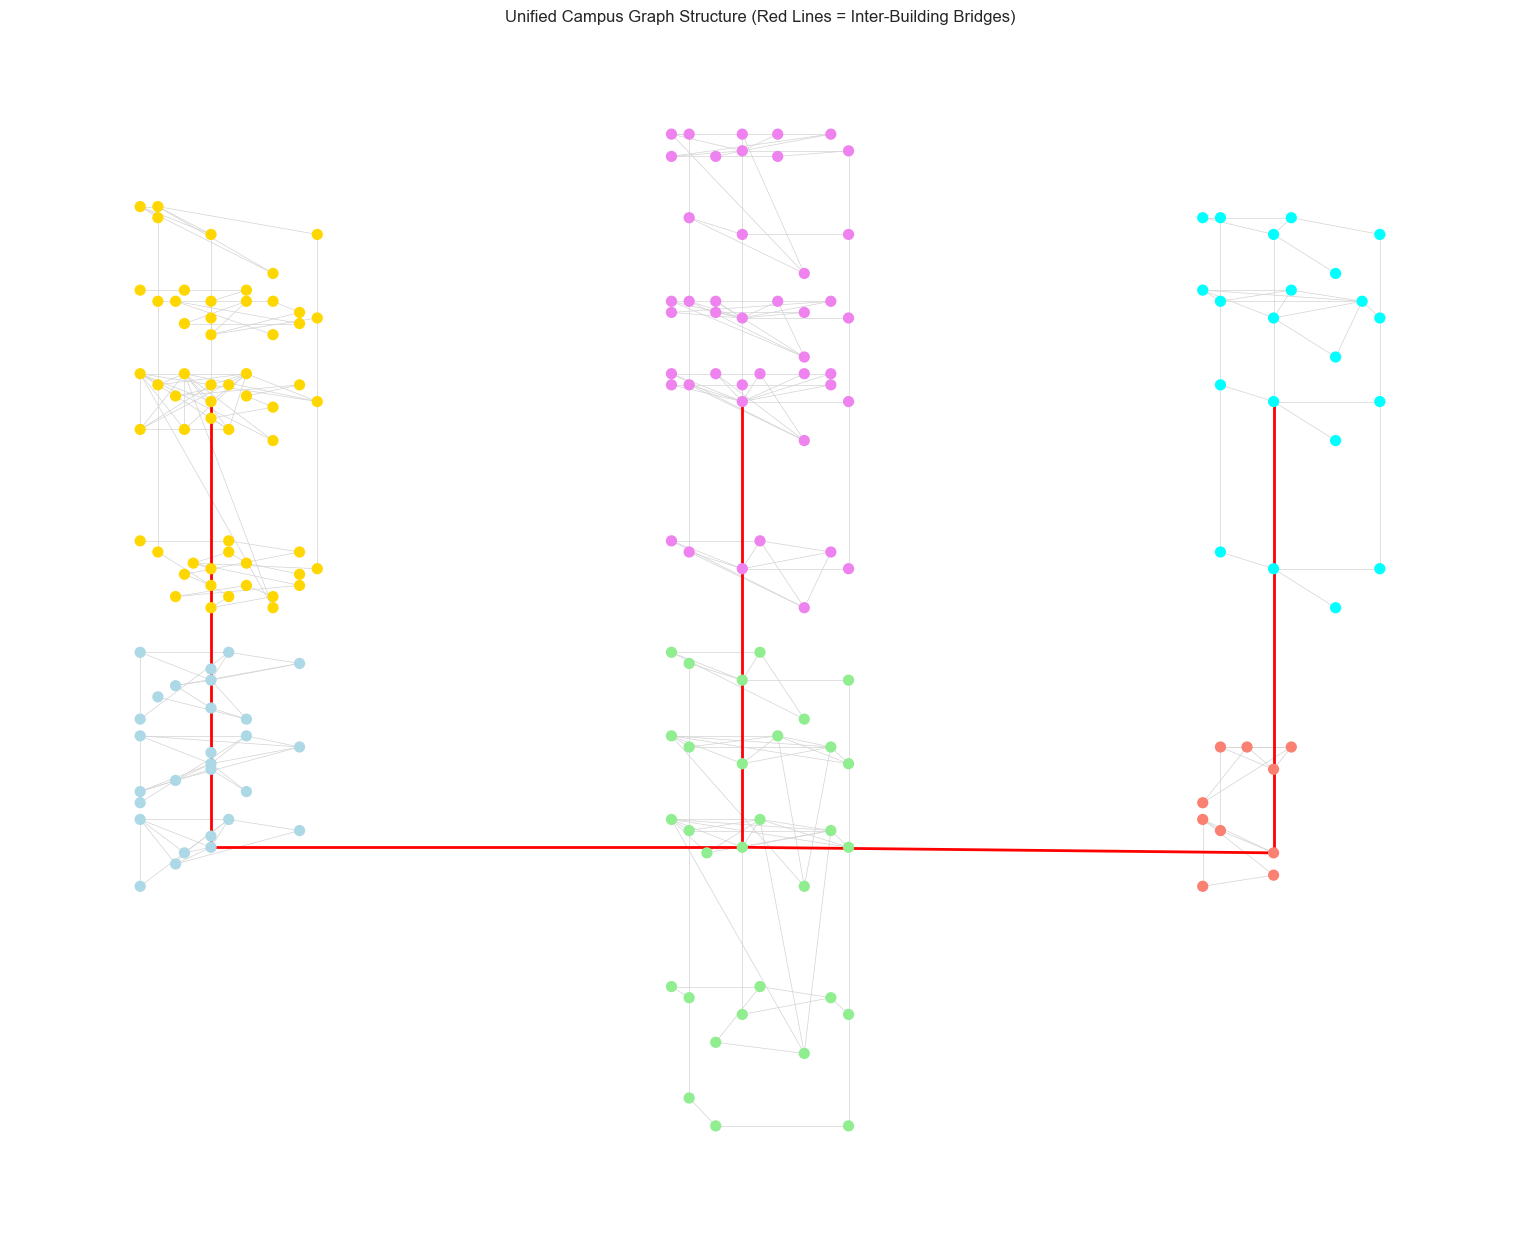

In [108]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_whole_campus_structure(graph_system): # the visualization of approximate campus graph
    plt.figure(figsize=(15, 12))

    # stacked positions
    FLOOR_OFFSET = 15
    pos_stacked = {}
    for n, data in graph_system.nodes.items():
        pos_stacked[n] = (data['x'], data['y'] + (data['floor'] * FLOOR_OFFSET))

    # a graph of all edges to show structure
    G = nx.Graph()
    for u, neighbors in graph_system.graph.items():
        for v, cost in neighbors:
            G.add_edge(u, v)

    # color of the nodes by Building
    node_colors = []
    for node in G.nodes():
        if node.startswith("A_"): node_colors.append('lightblue')
        elif node.startswith("B_"): node_colors.append('lightgreen')
        elif node.startswith("C_"): node_colors.append('salmon')
        elif node.startswith("D_"): node_colors.append('gold')
        elif node.startswith("E_"): node_colors.append('violet')
        elif node.startswith("L_"): node_colors.append('cyan')
        else: node_colors.append('gray')

    # map
    nx.draw(G, pos_stacked, node_color=node_colors, node_size=50, edge_color='lightgray', width=0.5, with_labels=False)

    # Highlight the bridges, the outdoor connections
    bridge_edges = []
    for u, v in G.edges():
        # If nodes are in different buildings, it's a bridge
        if u.split('_')[0] != v.split('_')[0]:
            bridge_edges.append((u, v))

    nx.draw_networkx_edges(G, pos_stacked, edgelist=bridge_edges,edge_color='red', width=2)

    plt.title("Unified Campus Graph Structure (Red Lines = Inter-Building Bridges)")
    plt.xlabel("X Coordinate (with Building Offsets)")
    plt.ylabel("Y Coordinate (Stacked Floors)")
    plt.grid(True, linestyle=':', alpha=0.3)
    plt.show()

# we run this using 'full_system' from the previous code
visualize_whole_campus_structure(full_system)

RUNNING MANUAL TEST: A_A101 -> B_B301
Algorithm | Cost | Nodes Exp. | Time
----------------------------------------------------------------------------------------------------
A^* | 70.40 | 34 | 0.01567530632019043
Path: ['A_A101', 'A_STAIRS_A1', 'B_STAIRS_1', 'B_STAIRS_2', 'B_STAIRS_3', 'B_B301']
Greedy BFS | 100.80 | 17 | 0.0
Path: ['A_A101', 'A_A102', 'A_STAIRS_A1', 'B_STAIRS_1', 'B_B101', 'B_ELEV_A_1', 'B_ELEV_A_2', 'B_B201', 'B_STAIRS_2', 'B_STAIRS_3', 'B_B301']


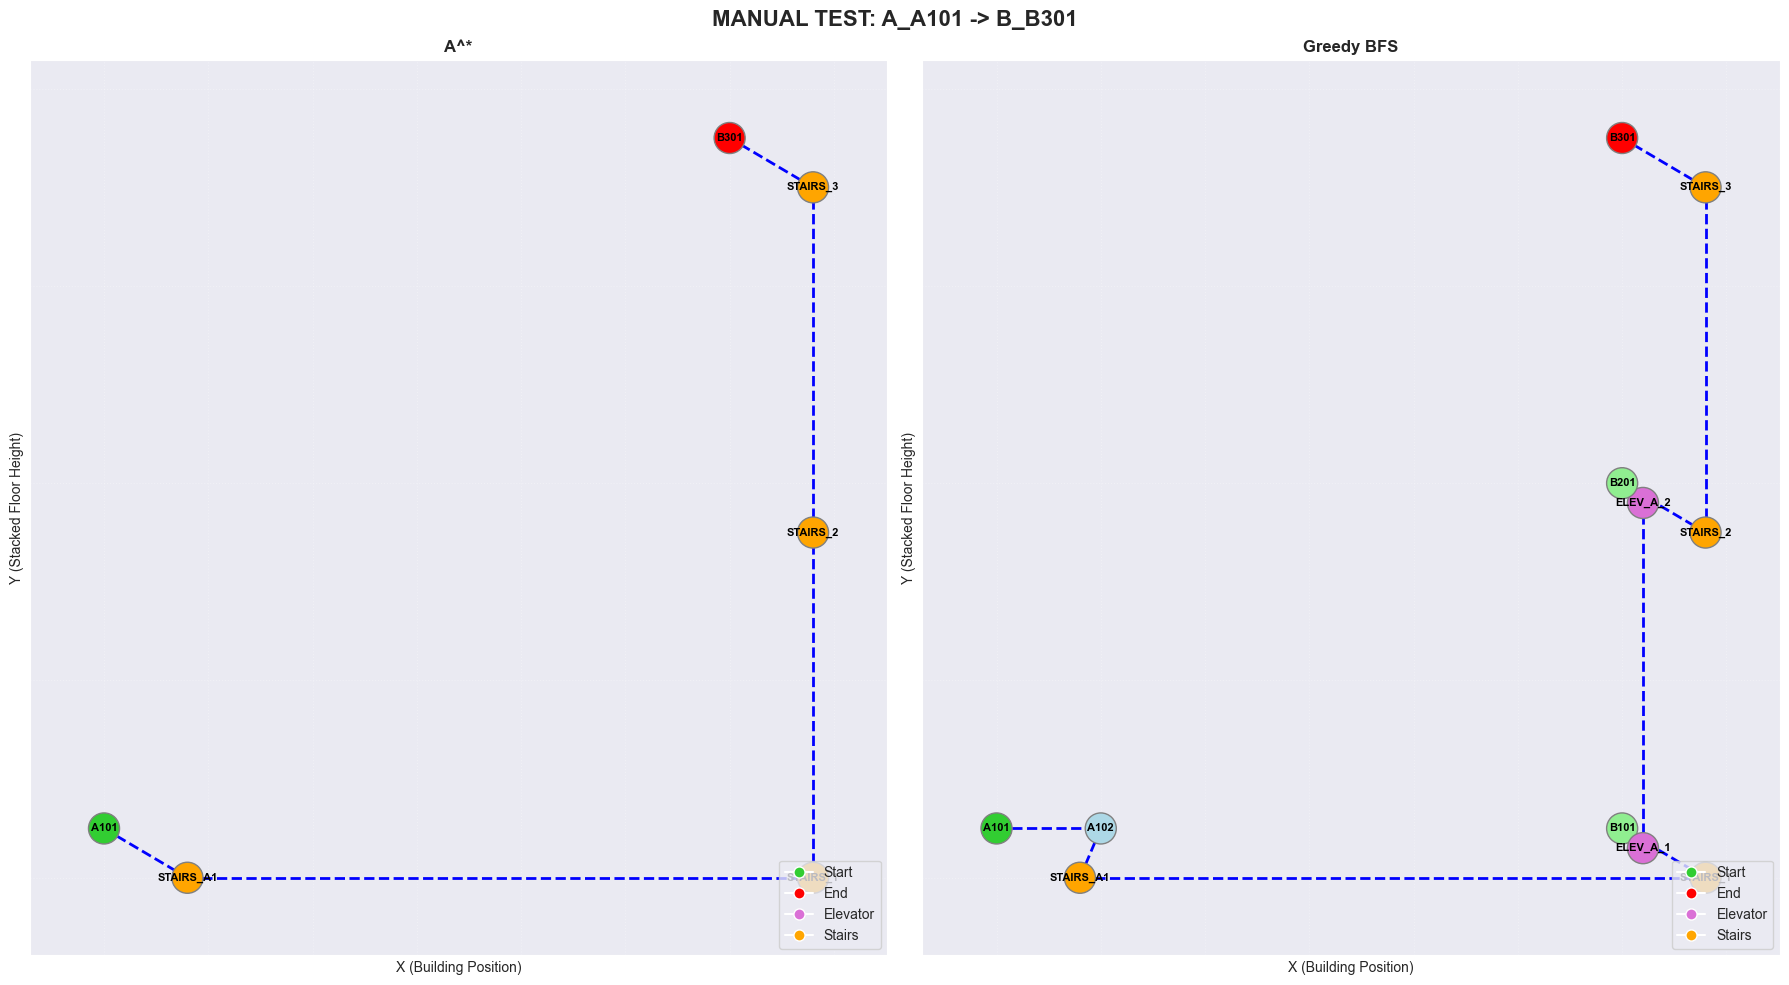

In [111]:
import matplotlib.pyplot as plt
import networkx as nx
import time

# again manual testing but this time between buildings
START_NODE = 'A_A101'
END_NODE = 'B_B301'

# visualization
def visualize_comparison_clean(graph_system, path_a, path_g, start, end):
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    fig.suptitle(f"MANUAL TEST: {start} -> {end}", fontsize=16, fontweight='bold')

    # (Y + Floor Offset)
    FLOOR_OFFSET = 35
    pos_stacked = {}
    for n, data in graph_system.nodes.items():
        pos_stacked[n] = (data['x'], data['y'] + (data['floor'] * FLOOR_OFFSET)) # the only difference is that we also add the new distance between buildings

    # subplot
    def draw_subplot(ax, path, algo_name):
        if not path:
            ax.text(0.5, 0.5, "No Path Found", ha='center', fontsize=12)
            ax.set_title(algo_name)
            return

        # Graph
        G = nx.Graph()
        path_edges = list(zip(path, path[1:]))
        G.add_edges_from(path_edges)

        # Colors and Labels
        node_colors = []
        labels = {}
        for node in path:
            # Color Logic
            if node == start: color = 'limegreen'
            elif node == end: color = 'red'
            elif "ELEV" in node: color = 'orchid'
            elif "STAIRS" in node: color = 'orange'
            # Building Colors
            elif node.startswith("A_"): color = 'lightblue'
            elif node.startswith("B_"): color = 'lightgreen'
            elif node.startswith("C_"): color = 'salmon'
            elif node.startswith("D_"): color = 'gold'
            elif node.startswith("E_"): color = 'violet'
            elif node.startswith("L_"): color = 'cyan'
            else: color = 'lightgray'
            node_colors.append(color)

            # Short Label
            short_name = node.split('_', 1)[1] if '_' in node else node
            labels[node] = short_name

        # Draw
        nx.draw_networkx_nodes(G, pos_stacked, ax=ax, node_color=node_colors, node_size=500, edgecolors='gray')
        nx.draw_networkx_edges(G, pos_stacked, ax=ax, edgelist=path_edges, edge_color='blue', width=2, style='dashed')
        nx.draw_networkx_labels(G, pos_stacked, ax=ax, labels=labels, font_size=8, font_weight='bold')

        ax.set_title(algo_name, fontsize=12, fontweight='bold')
        ax.set_xlabel("X (Building Position)")
        ax.set_ylabel("Y (Stacked Floor Height)")
        ax.grid(True, linestyle=':', alpha=0.3)

        # Legend
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor='limegreen', label='Start', markersize=8),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='End', markersize=8),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='orchid', label='Elevator', markersize=8),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='Stairs', markersize=8)
        ]
        ax.legend(handles=legend_elements, loc='lower right')

    draw_subplot(axes[0], path_a, "A^*")
    draw_subplot(axes[1], path_g, "Greedy BFS")
    plt.tight_layout()
    plt.show()

# Execution
print(f"RUNNING MANUAL TEST: {START_NODE} -> {END_NODE}")
print("=" * 100)

# checking if nodes exist
if START_NODE not in full_system.nodes or END_NODE not in full_system.nodes:
    print(f"ERROR: One of the nodes does not exist in the graph.")
    print("Available prefixes: A_, B_, C_, D_, E_, L_")
else:
    print(f"{'Algorithm'} | {'Cost'} | {'Nodes Exp.'} | {'Time'}")
    print("-" * 100)

    # A^*
    t0 = time.time()
    path_a, cost_a, exp_a = full_system.a_star_search(START_NODE, END_NODE)
    t1 = time.time()
    cost_str_a = f"{cost_a:.2f}" if path_a else "None"
    print(f"{'A^*'} | {cost_str_a} | {exp_a} | {t1-t0}")
    print(f"Path: {path_a}")

    # Greedy
    t0 = time.time()
    path_g, cost_g, exp_g = full_system.greedy_best_first_search(START_NODE, END_NODE)
    t1 = time.time()
    cost_str_g = f"{cost_g:.2f}" if path_g else "None"
    print(f"{'Greedy BFS'} | {cost_str_g} | {exp_g} | {t1-t0}")
    print(f"Path: {path_g}")
    print("=" * 100)

    # Visualize
    visualize_comparison_clean(full_system, path_a, path_g, START_NODE, END_NODE)